In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 1 a)

In [44]:
iris = datasets.load_iris()

In [45]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [46]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21f6a8d0>,
      dtype=object)

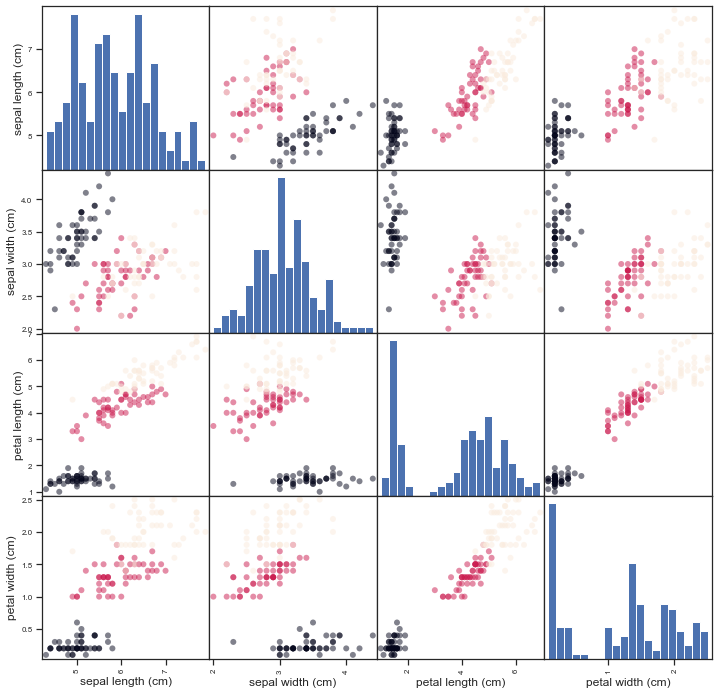

In [47]:
X = iris.data
Y = iris.target
df = pd.DataFrame(X,columns = iris.feature_names)

pd.plotting.scatter_matrix(df, c=Y, figsize = (12,12),marker = 'o', density_kwds = None,hist_kwds = {"bins":20})



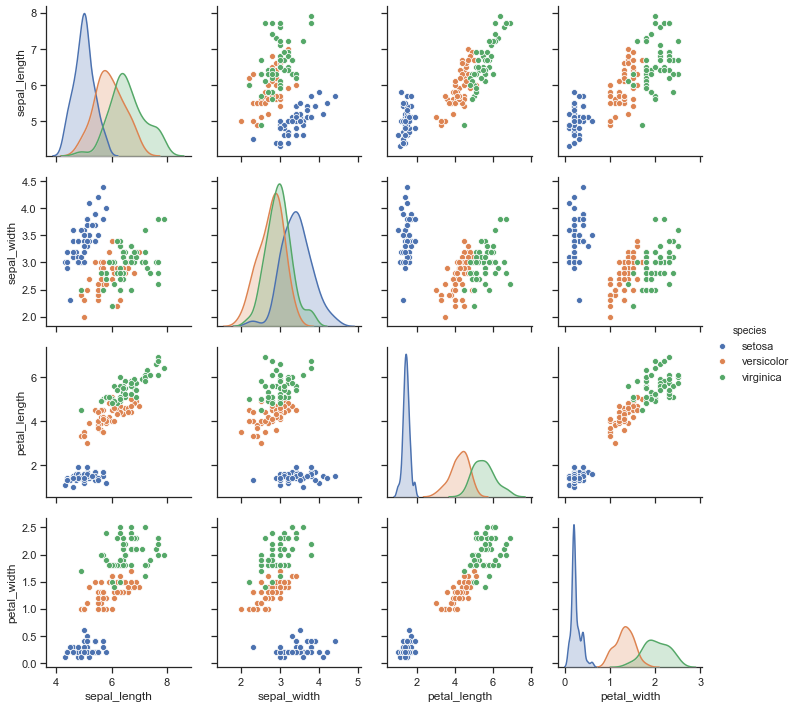

In [48]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
%matplotlib inline

iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
# the distribution plot only look at x-axis

### 1 b)

In [60]:
Y[Y == 1] = 0 # only predict virginica class

In [62]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [63]:
cv_method = LeaveOneOut()

In [64]:
#Logistic Regression

In [65]:
result1 = cross_val_score(LogisticRegression(solver='lbfgs'),X,Y,cv = cv_method)
accuracy = result1.mean()
accuracy

0.9733333333333334

#### The accuracy rate is 0.973 when performing LOOCV cross validation.

### 1 c)

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:
cv_method = KFold(n_splits = 5, shuffle = True,random_state = 0)

In [74]:
result = cross_val_score(LogisticRegression(solver = 'lbfgs'),X,Y,cv = cv_method,scoring = 'accuracy')
accuracy = result.mean()
accuracy

0.9533333333333334

In [75]:
cv_method = KFold(n_splits = 5, shuffle = False,random_state = 0)

In [76]:
result = cross_val_score(LogisticRegression(solver = 'lbfgs'),X,Y,cv= cv_method,scoring = 'accuracy')
accuracy = result.mean()
accuracy

0.9266666666666665

#### when shuffle = True, the accuracy rate is 0.953
#### when shuffl = False, the accuracy rate is 0.926

### 2 a)

In [88]:
import statsmodels.api as sm

In [89]:
flushot = pd.read_csv("flushots.csv")

In [90]:
flushot[:5]

,shot,age,index1,gender
0,0,59,52,0
1,0,61,55,1
2,1,82,51,0
3,0,51,70,0
4,0,53,70,0


In [124]:
Y = flushot["shot"]
X1 = flushot["age"]
X2 = flushot["index1"]# health awareness
X3 = flushot["gender"]

In [184]:
X1 = sm.add_constant(X1)

In [160]:
model1 = sm.GLM(Y,X1,family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   shot   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.133
Date:                Tue, 08 Oct 2019   Deviance:                       116.27
Time:                        17:20:37   Pearson chi2:                     153.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7433      1.853     -4.718      0.000     -12.375      -5.111
age            0.1087      0.027      3.973      0.000       0.055       0.162
==============================================================================
"""

In [161]:
model1.params

const   -8.743260
age      0.108737
dtype: float64

In [162]:
X2 = sm.add_constant(X2)

In [163]:
model2 = sm.GLM(Y,X2,family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   shot   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -56.598
Date:                Tue, 08 Oct 2019   Deviance:                       113.20
Time:                        17:20:38   Pearson chi2:                     181.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9113      1.627      3.019      0.003       1.723       8.099
index1        -0.1193      0.030     -3.960      0.000      -0.178      -0.060
==============================================================================
"""

In [164]:
model2.params

const     4.911329
index1   -0.119309
dtype: float64

In [165]:
X3 = sm.add_constant(X3)

In [166]:
model3 = sm.GLM(Y,X3,family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   shot   No. Observations:                  159
Model:                            GLM   Df Residuals:                      157
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -66.440
Date:                Tue, 08 Oct 2019   Deviance:                       132.88
Time:                        17:20:40   Pearson chi2:                     159.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0794      0.354     -5.882      0.000      -2.772      -1.386
gender         0.6444      0.456      1.414      0.157      -0.249       1.537
==============================================================================
"""

In [167]:
model3.params

const    -2.079442
gender    0.644357
dtype: float64

#### For the predictor age, the fitted equation is 1/(1+e^(8.743-0.108)*X1)
#### For the predictor health awareness index, the fitted equation is 1/(1+e^(-4.911+0.119)*X2)
#### For the predictor gender, the fitted equation is 1/(1+e^(2.079-0.644)*X3)

### 2 b)

In [219]:
model1.predict([1,55]) # Age of 55

array([0.05937092])

In [222]:
model2.predict([1,60]) # with health awareness index of 60

array([0.09558884])

In [223]:
model3.predict([1,1]) # male clients

array([0.19230769])

### 2 c)

In [173]:
# use AIC to find the best fit model

In [174]:
AIC = [model1.aic,model2.aic,model3.aic]
AIC

[120.26695826327158, 117.19579725936083, 136.88089493174806]

In [175]:
min(AIC)

117.19579725936083

#### AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.
#### From AIC, the lowest AIC model can fits best, which is index model

In [176]:
# use Kfold cross validation to find the accuracy rate, and find the best predicts model

In [177]:
folds = 5

In [245]:
kfold = KFold(n_splits=folds, shuffle = True)

In [246]:
k1 = cross_val_score(LogisticRegression(solver = 'lbfgs',C=10**9),X1,Y,cv = kfold,scoring ='accuracy')
k1 = k1.mean()
k1 ## C is regression ression, which is not considered in model GLM, but in sklearn, logistic regression, it has, we set it very large, so the reciporal could be very small

0.8425403225806452

In [247]:
k2 = cross_val_score(LogisticRegression(solver = 'lbfgs',C=10**9),X2,Y,cv = kfold,scoring ='accuracy')
k2 = k2.mean()
k2

0.8554435483870968

In [248]:
k3 = cross_val_score(LogisticRegression(solver = 'lbfgs',C=10**9),X3,Y,cv = kfold,scoring ='accuracy')
k3 = k3.mean()
k3

0.8491935483870968

In [244]:
K = [k1,k2,k3]
max(K)

0.8554435483870968

#### The largest accuracy rate can predict best, which is health awareness(index) model.

### 2 d)

In [192]:
n = len(Y)
n

159

In [206]:
ageX1=flushot['age']
xaxis = range(np.max(ageX1))
yaxis = model1.predict(sm.add_constant(xaxis))

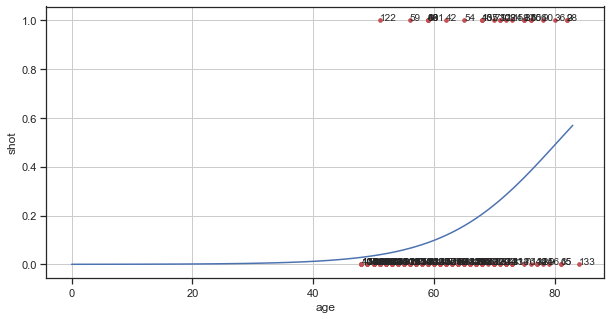

In [207]:
plt.figure(figsize=(10,5))
plt.scatter(ageX1,Y,s=13,c='r')

for i in range(0,159,1):
    plt.annotate(i,(ageX1[i],y[i]))

# fitted curve
plt.plot(xaxis,yaxis)

plt.xlabel('age')
plt.ylabel('shot')
plt.grid()

In [208]:
indexX2=flushot['index1']
xaxis = range(np.max(indexX2))
yaxis = model2.predict(sm.add_constant(xaxis))

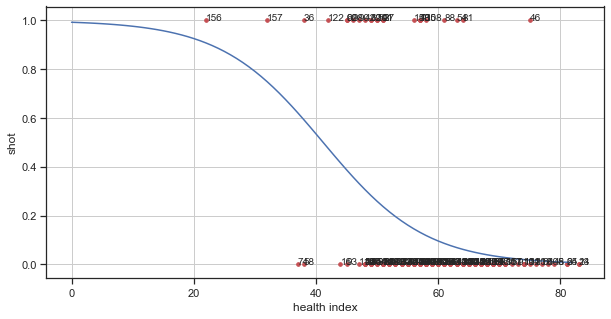

In [210]:
plt.figure(figsize=(10,5))
plt.scatter(indexX2,Y,s=13,c='r')

for i in range(0,159,1):
    plt.annotate(i,(indexX2[i],y[i]))

# fitted curve
plt.plot(xaxis,yaxis)

plt.xlabel('health index')
plt.ylabel('shot')
plt.grid()

### 3 a)

#### The fitted equation is F(x) =  1 / (1 + e^(25-0.20)*X)

### 3 b)

#### When F(x) = 0.5, so 0.5 = 1/(1+e^(25-0.2)*X)
#### 1 = e^(25-0.2*X)
#### X = (25-ln(1))/0.2 = 125 - 5*ln(1)


### 3 c)

#### O2/O1 = e^0.2(150-160) = e^-2